# GAIA Cluster Dating
In this program, GAIA data of M45 (pleiades) and NGC 6121 were downloaded from the GAIA database. The clusters were then dated using the GAIA parallax measurements, as well as with the 'isochrone' dating method were M45 was used to date NGC 6121.

<img src='GAIA_DATA/M45_CMD.png' width="700">

In [1]:
import numpy as np
import astropy
from astropy.table import Table
from astropy import timeseries
import matplotlib.pyplot as plt
import random
# uncomment for interactive plots
#%matplotlib ipympl

In [124]:
data_M45 = Table.read("GAIA_DATA/1741958709642O-result.csv", format="csv")
data_NGC6121 = Table.read("GAIA_DATA/1742047473332O-result.csv", format="csv")

In [125]:
def create_figure(figsize):
    '''
    template for matplotlib.pyplot plots
    Parameters
    ----------
    figsize: tuple
        sets the figure size of a matplotlib plot
    Example
    -------
        figsize = (5,5)
    '''
    plt.figure(figsize = figsize)
    plt.rcParams['font.family'] = 'courier new'
    plt.rcParams['mathtext.default'] = 'regular'
    plt.rcParams['axes.linewidth'] = 0.5
    plt.minorticks_on()
    plt.tick_params(axis = 'both', length = 3, direction = 'in', which = 'both', right = True, top = True)

In [126]:
# load data from astropy tables
ra_M45 = data_M45['ra'] # degree
dec_M45 = data_M45['dec'] # degree
pmra_M45 = data_M45['pmra'] # milliarcsecond/yr
pmdec_M45 = data_M45['pmdec'] # milliarcsecond/yr
bp_rp_M45 = data_M45['bp_rp'] # magnitude
phot_g_mean_mag_M45 = data_M45['phot_g_mean_mag'] # magnitude
parallax_M45 = data_M45['parallax'] # milliarcsecond

ra_NGC6121 = data_NGC6121['ra'] # degree
dec_NGC6121 = data_NGC6121['dec'] # degree
pmra_NGC6121 = data_NGC6121['pmra'] # milliarcsecond/yr
pmdec_NGC6121 = data_NGC6121['pmdec'] # milliarcsecond/yr
bp_rp_NGC6121 = data_NGC6121['bp_rp'] # magnitude
phot_g_mean_mag_NGC6121 = data_NGC6121['phot_g_mean_mag'] # magnitude
parallax_NGC6121 = data_NGC6121['parallax'] # milliarcsecond

# M45
## Separating M45 from background stars
The cluster dataset includes all stars 1.5º around M45, meaning many background stars exist. By plotting the proper motion adjusted declination as a function of the proper motion adjusted right ascension, we can visually separate M45 from background stars. We then can create a mask to select only stars in M45.

In [127]:
R = 5
mask = (pmra_M45 - 19.8)**2 + (pmdec_M45 + 45.5)**2 < R**2
M45 = np.where(mask == True)[0]

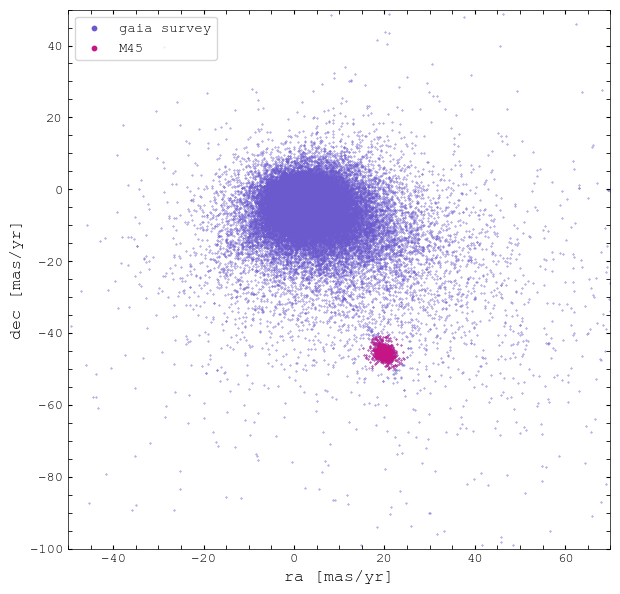

In [128]:
create_figure((7,7))
plt.scatter(pmra_M45, pmdec_M45, s = 0.1, c = 'slateblue', label = 'gaia survey')
plt.scatter(pmra_M45[M45], pmdec_M45[M45], s = 0.1, c = 'mediumvioletred', label = 'M45')
plt.ylim(-100,50)
plt.xlim(-50, 70)
plt.xlabel('ra [mas/yr]', size = 12)
plt.ylabel('dec [mas/yr]', size = 12)
plt.legend(markerscale = 10)
plt.show()

Here we can see all the stars in M45

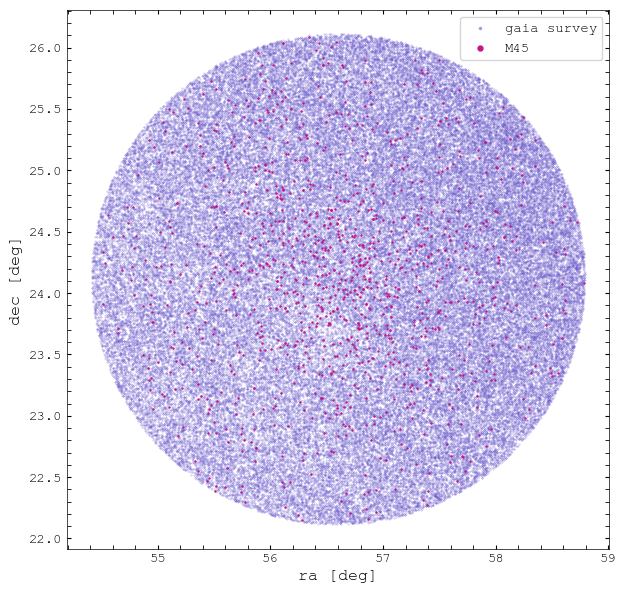

In [129]:
plt.figure(figsize = (7,7))
plt.rcParams['font.family'] = 'courier new'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.linewidth'] = 0.5
plt.minorticks_on()
plt.tick_params(axis = 'both', length = 3, direction = 'in', which = 'both', right = True, top = True)
plt.scatter(ra_M45, dec_M45, s = 0.1, alpha = 0.48, c = 'slateblue', label = 'gaia survey')
plt.scatter(ra_M45[M45], dec_M45[M45], s = 0.5, c = 'mediumvioletred', label = 'M45')
plt.xlabel('ra [deg]', size = 12)
plt.ylabel('dec [deg]', size = 12)
plt.legend(markerscale = 5)
plt.show()

## M45 HR diagram
we can now plot the HR diagram of the entire data set as well as the HR diagram of M45

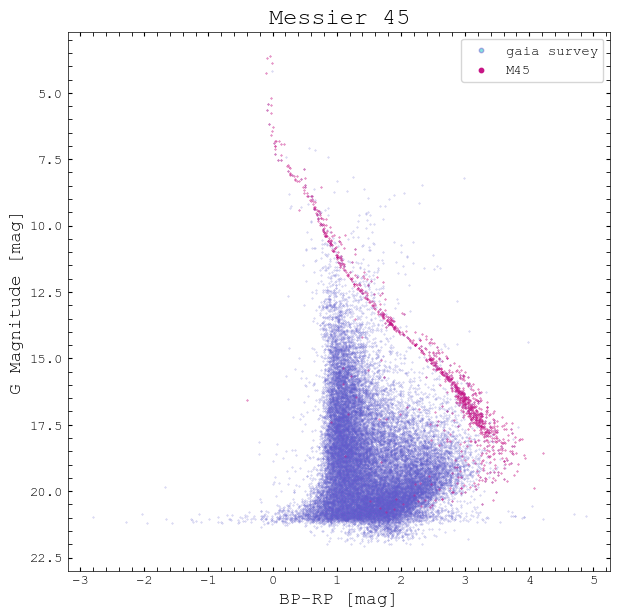

In [130]:
# random sample of points for clarity in plot
idx=random.sample(range(bp_rp_M45.shape[0]),30000)
plt.figure(figsize = (7,7))
plt.rcParams['font.family'] = 'courier new'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.linewidth'] = 0.5
plt.minorticks_on()
plt.tick_params(axis = 'both', length = 3, direction = 'in', which = 'both', right = True, top = True)
plt.scatter(bp_rp_M45[idx], phot_g_mean_mag_M45[idx], s = 0.1, c = 'c', edgecolor='slateblue', label = 'gaia survey', alpha = 0.48)
plt.scatter(bp_rp_M45[M45], phot_g_mean_mag_M45[M45], s = 0.1, c = 'mediumvioletred', label = 'M45')
plt.xlabel('BP-RP [mag]', size = 13)
plt.ylabel('G Magnitude [mag]', size = 13)
plt.gca().invert_yaxis()
plt.legend(markerscale = 10)
plt.title('Messier 45', size = 17)
#plt.savefig('M45_CMD.png', dpi = 300)
plt.show()

## Binary track
we can also clearly see the binary star track in the HR diagram, where the presence of a second star raises the Luminosity of the star on the HR diagram.

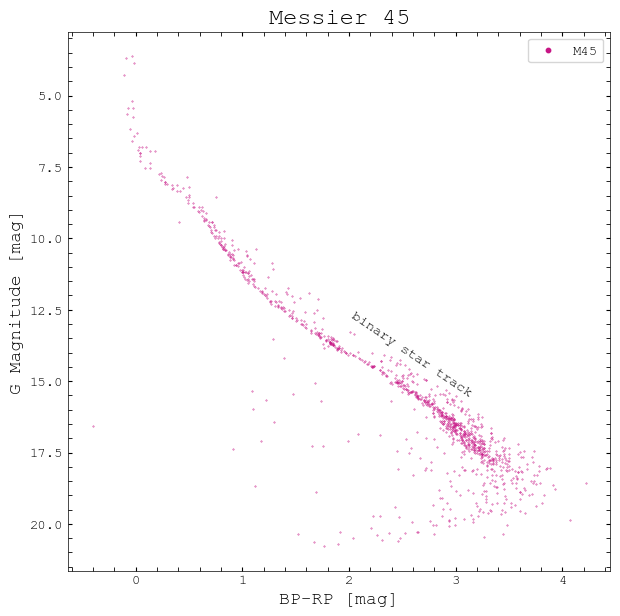

In [131]:
plt.figure(figsize = (7,7))
plt.rcParams['font.family'] = 'courier new'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.linewidth'] = 0.5
plt.minorticks_on()
plt.tick_params(axis = 'both', length = 3, direction = 'in', which = 'both', right = True, top = True)
plt.scatter(bp_rp_M45[M45], phot_g_mean_mag_M45[M45], s = 0.1, c = 'mediumvioletred', label = 'M45')
plt.text(2, 15.5, 'binary star track', rotation=-34)
plt.xlabel('BP-RP [mag]', size = 13)
plt.ylabel('G Magnitude [mag]', size = 13)
plt.gca().invert_yaxis()
plt.legend(markerscale = 10)
plt.title('Messier 45', size = 17)
plt.show()

## Dating M45
GAIA has extremely precise parallax measurements which we can use to date M45. By identifying the bins index with the maximum number of counts, we can use that value as the parallax value.

In [132]:
# compute histogram of M45 parallax
n, bins = np.histogram(parallax_M45[M45], bins = 500)
# find bin index with max number of counts
idxmax = np.where(n == np.max(n))[0]

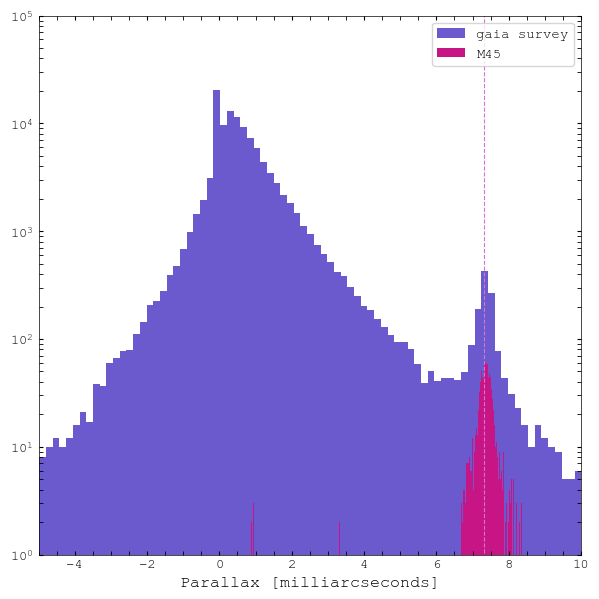

In [133]:
create_figure((7,7))
plt.hist(parallax_M45, bins = 500, color = 'slateblue', label = 'gaia survey')
plt.hist(parallax_M45[M45], bins = 500, color = 'mediumvioletred', label = 'M45')
plt.vlines(bins[idxmax], 0, 1e5, lw = 0.8, ls = '--', color = 'orchid')
plt.xlim(-5, 10)
plt.ylim(1, 1e5)
plt.yscale('log')
plt.xlabel('Parallax [milliarcseconds]', size = 12)
plt.legend()
plt.show()

## Compute distance
we can compute the distance with the parallax formula, making sure to convert the milliarcseconds into arcseconds. Our computed distance is very close with the distance value of M45 found on SIMBAD!

In [134]:
def compute_distance(parallax):
    # milliarcseconds to arcseconds conversion factor
    mas_2_as = 1000
    distance_pc = (1/parallax)*mas_2_as
    return distance_pc

d_M45 = compute_distance(bins[idxmax])
print(f'Computed distance to Pleiades: {d_M45[0]} [pc]')
print('Literature distance to Pleiades: 136.2 [pc]')

Computed distance to Pleiades: 136.4426473140449 [pc]
Literature distance to Pleiades: 136.2 [pc]


## Converting to Absolute Magnitude
Now that we have a distance, we can convert to Absolute Magnitude.

In [135]:
def convert_2_abs_mag(m, d):
    M = m - 5*np.log10(d) + 5
    return M
abs_mag_M45 = convert_2_abs_mag(phot_g_mean_mag_M45, d_M45)

# NGC 6121
We can now repeat the same steps for NGC 6121.

In [136]:
R = 7
mask = (pmra_NGC6121 + 12.3)**2 + (pmdec_NGC6121 + 19)**2 < R**2
NGC6121 = np.where(mask == True)[0]

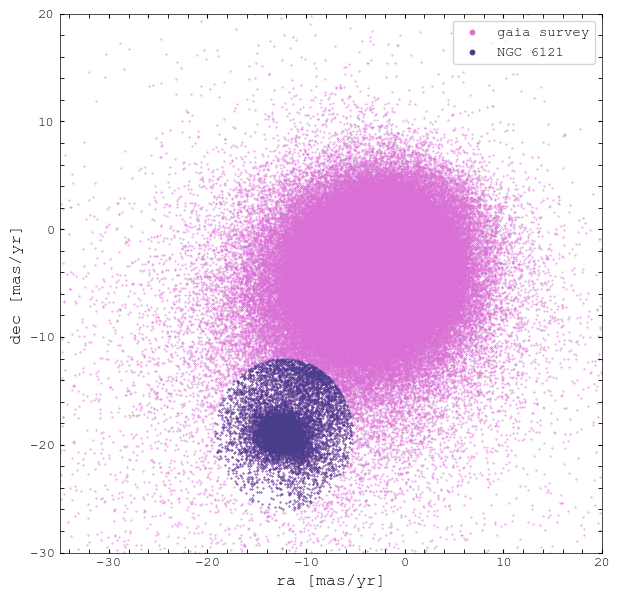

In [137]:
create_figure((7,7))
plt.scatter(pmra_NGC6121, pmdec_NGC6121, s = 0.1, c = 'orchid', label = 'gaia survey', alpha = 1)
plt.scatter(pmra_NGC6121[NGC6121], pmdec_NGC6121[NGC6121], s = 0.1, c = 'darkslateblue', label = 'NGC 6121', alpha = 1)
plt.ylim(-30,20)
plt.xlim(-35, 20)
plt.legend(markerscale = 10)
plt.xlabel('ra [mas/yr]', size = 12)
plt.ylabel('dec [mas/yr]', size = 12)
plt.show()

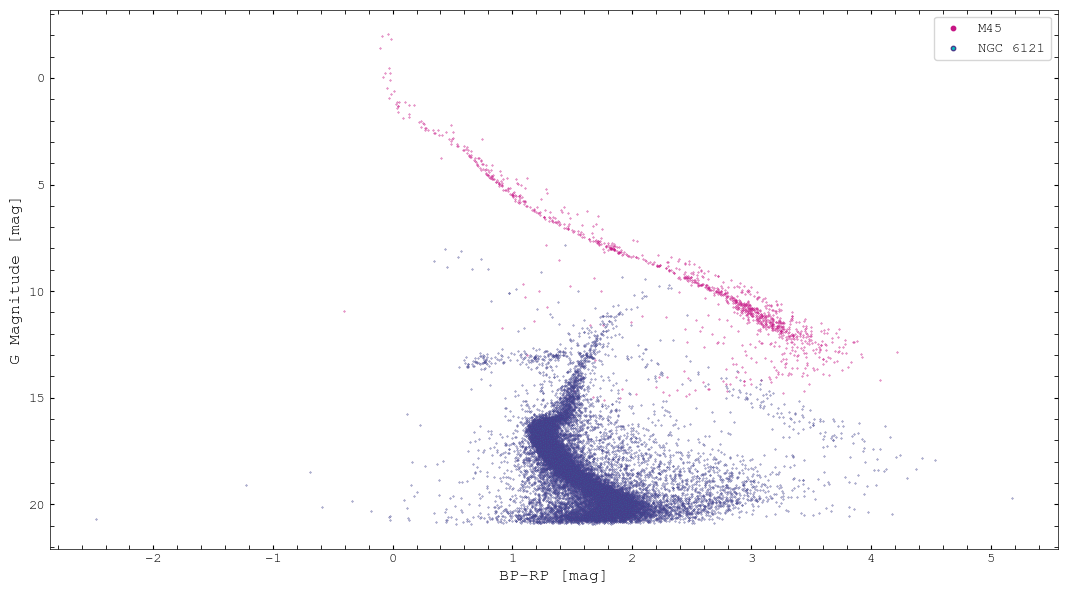

In [138]:
plt.figure(figsize = (13,7))
plt.rcParams['font.family'] = 'courier new'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.linewidth'] = 0.5
plt.minorticks_on()
plt.tick_params(axis = 'both', length = 3, direction = 'in', which = 'both', right = True, top = True)
plt.scatter(bp_rp_M45[M45], abs_mag_M45[M45], s = 0.1, c = 'mediumvioletred', label = 'M45')
plt.scatter(bp_rp_NGC6121[NGC6121], phot_g_mean_mag_NGC6121[NGC6121], edgecolor='darkslateblue', 
            s = 0.1, c = 'c',  label = 'NGC 6121')
plt.xlabel('BP-RP [mag]', size = 12)
plt.ylabel('G Magnitude [mag]', size = 12)
plt.gca().invert_yaxis()
plt.legend(markerscale = 10)
plt.show()

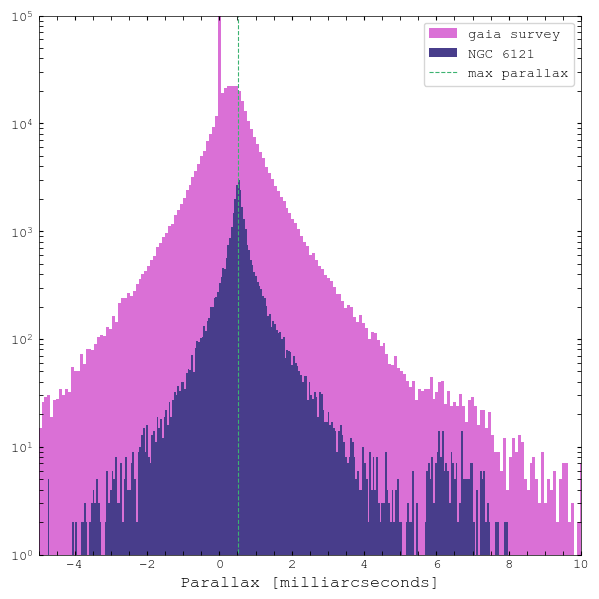

In [139]:
n, bins = np.histogram(parallax_NGC6121[NGC6121], bins = 500)
idxmax = np.where(n == np.max(n))[0]
create_figure((7,7))
plt.hist(parallax_NGC6121, bins = 600, color = 'orchid', label = 'gaia survey')
plt.hist(parallax_NGC6121[NGC6121], bins = 500, color = 'darkslateblue', label = 'NGC 6121')
plt.vlines(bins[idxmax], 0, 1e5, lw = 0.8, ls = '--', color = 'mediumseagreen', label = 'max parallax')
plt.xlim(-5, 10)
plt.ylim(1, 1e5)
plt.yscale('log')
plt.xlabel('Parallax [milliarcseconds]', size = 12)
plt.legend()
plt.show()

In [140]:
d_NGC6121 = compute_distance(bins[idxmax])
print(f'Computed distance to NGC 6121: {d_NGC6121[0]} [pc]')
print('Literature distance to NGC 6121: 1850 [pc]')
abs_mag_NGC6121 = convert_2_abs_mag(phot_g_mean_mag_NGC6121, d_NGC6121)

Computed distance to NGC 6121: 1952.38881950548 [pc]
Literature distance to NGC 6121: 1850 [pc]


## Plotting both cluster HR diagrams on the same plot in absolute magnitude

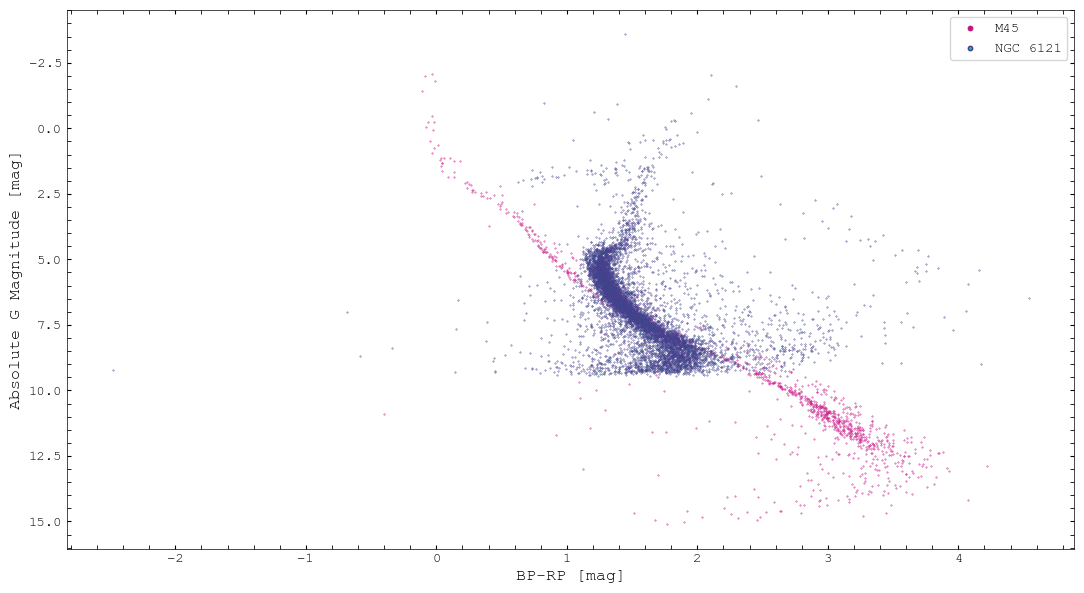

In [141]:
idx_6121 = random.sample(range(bp_rp_NGC6121[NGC6121].shape[0]),9000)
plt.figure(figsize = (13,7))
plt.rcParams['font.family'] = 'courier new'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.linewidth'] = 0.5
plt.minorticks_on()
plt.tick_params(axis = 'both', length = 3, direction = 'in', which = 'both', right = True, top = True)
plt.scatter(bp_rp_M45[M45], abs_mag_M45[M45], s = 0.1, c = 'mediumvioletred', label = 'M45')
plt.scatter(bp_rp_NGC6121[NGC6121][idx_6121], abs_mag_NGC6121[NGC6121][idx_6121], edgecolor='darkslateblue', s = 0.1, c = 'c',  label = 'NGC 6121')
plt.xlabel('BP-RP [mag]', size = 12)
plt.ylabel('Absolute G Magnitude [mag]', size = 12)
plt.gca().invert_yaxis()
plt.legend(markerscale = 10)
plt.show()

## Cluster dating using an isochrone
Now that M45 is converted to absolute Magnitude, we can use it as an alternative method to date NGC 6121. By measuring the distance $\mu$ between the two clusters along an x value, we can estimate the distance!

In [142]:
# compute magnitude difference between M45 [abs mag] and NGC 6121 [apparent mag]
mu = 19.3-8.08
# use M45 to date NGC 6121
d_NGC6121_c = 10**((mu/5)+1)
print(f'Computed distance to NGC 6121: {d_NGC6121[0]} [pc]')
print('Literature distance to NGC 6121: 1850 [pc]')
print(f'Estimated distance to NGC 6121: {d_NGC6121_c} [pc]')

Computed distance to NGC 6121: 1952.38881950548 [pc]
Literature distance to NGC 6121: 1850 [pc]
Estimated distance to NGC 6121: 1753.880501841762 [pc]


# Variable white dwarf CBS 389
Using the Lomb Scargle method, we can measure the period of a variable white dwarf.

In [143]:
CBS_389 = Table.read('GAIA_DATA/EPOCH_PHOTOMETRY-Gaia DR3 1286055427676135808.csv', format="csv")
CBS389_time = CBS_389['g_transit_time']
CBS389g_flux = CBS_389['g_transit_flux']
CBS389_flux_err = CBS_389['g_transit_flux_error']
CBS389g_mag = CBS_389['g_transit_mag']
CBS389gmag_err = (2.5/np.log(10))*(CBS389_flux_err/CBS389g_flux)

In [144]:
# There is an outlier which we will remove
remove_outliers = CBS389g_mag < 17.5
CBS389g_mag = CBS389g_mag[remove_outliers]
CBS389_time = CBS389_time[remove_outliers]
CBS389gmag_err = CBS389gmag_err[remove_outliers]

## Plotting the light curve

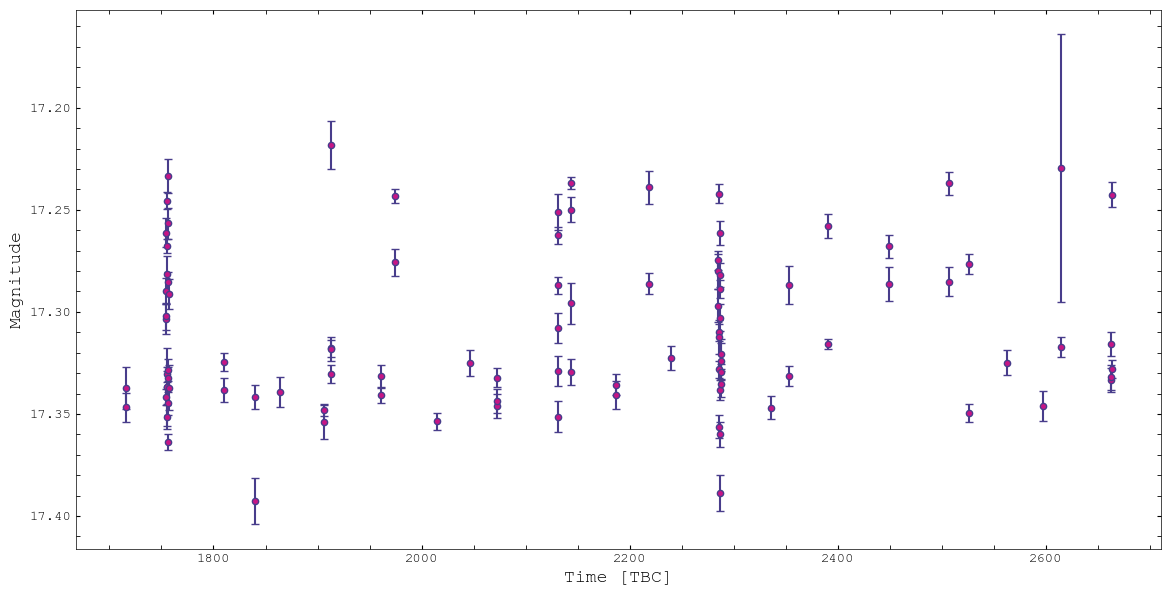

In [145]:
create_figure((14,7))
plt.errorbar(CBS389_time, CBS389g_mag, yerr = CBS389gmag_err, fmt='o', ms = 4.5, capsize=3, 
             capthick = 1, mec='darkslateblue',ecolor = 'darkslateblue',color = 'mediumvioletred')
plt.gca().invert_yaxis()
plt.xlabel('Time [TBC]', size = 13)
plt.ylabel('Magnitude', size = 13)

plt.show()

## Lomb-Scargle
The Lomb-Scargle method fits sine curves to the frequencies of the data to find the peak.

In [146]:
freq, power = astropy.timeseries.LombScargle(CBS389_time, CBS389g_mag-np.mean(CBS389g_mag)).autopower(minimum_frequency=0.001, 
                                                                                                      maximum_frequency=15)
peak_power = np.argmax(power)
peak_freq = freq[peak_power]
print(f'Peak frequency: {peak_freq} [1/days]')

Peak frequency: 1.0312909733919893 [1/days]


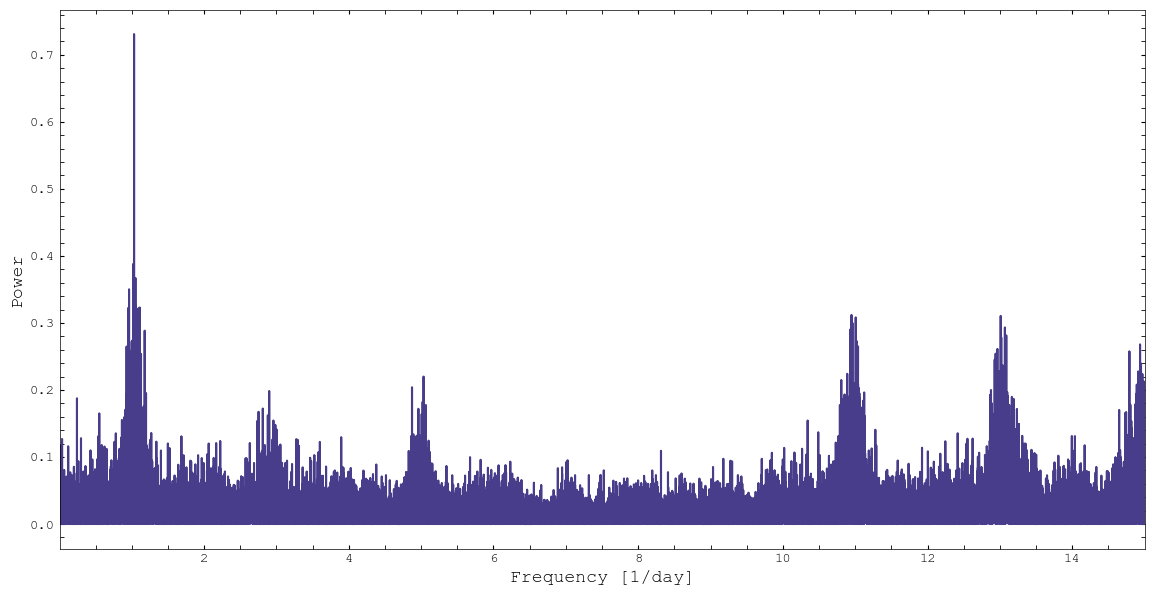

In [147]:
create_figure((14,7))
plt.plot(freq, power, color = 'darkslateblue')
plt.xlim(freq.min(), freq.max())
plt.xlabel('Frequency [1/day]', size = 13)
plt.ylabel('Power', size = 13)
plt.show()

## Zooming in

In [148]:
freq, power = astropy.timeseries.LombScargle(CBS389_time, CBS389g_mag-np.mean(CBS389g_mag)).autopower(minimum_frequency=0.001, 
                                                                                                      maximum_frequency=2)

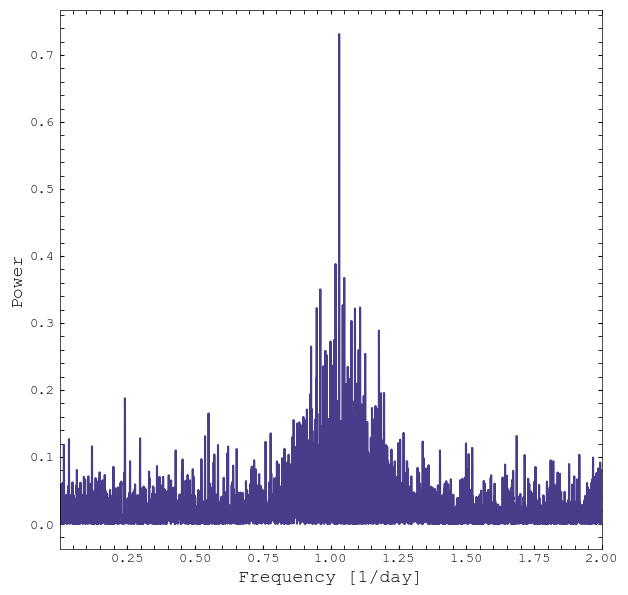

In [149]:
create_figure((7,7))
plt.plot(freq, power, color = 'darkslateblue')
plt.xlim(freq.min(), freq.max())
plt.xlabel('Frequency [1/day]', size = 13)
plt.ylabel('Power', size = 13)

plt.show()

## GAIA photometry

In [150]:
star = Table.read('GAIA_DATA/EPOCH_PHOTOMETRY-Gaia DR3 2027177220301507072.csv', format="csv")
g_time = star['g_transit_time']
g_flux = star['g_transit_flux']
flux_err = star['g_transit_flux_error']
g_mag = star['g_transit_mag']

In [151]:
def compute_weighted_mean(y, error):
    weights = 1/(error**2)
    weighted_mean = np.sum(weights*y)/np.sum(weights)
    return weighted_mean

In [152]:
mean_flux = np.mean(g_flux)
median_flux = np.median(g_flux)
weighted_mean_flux = compute_weighted_mean(g_flux, flux_err)

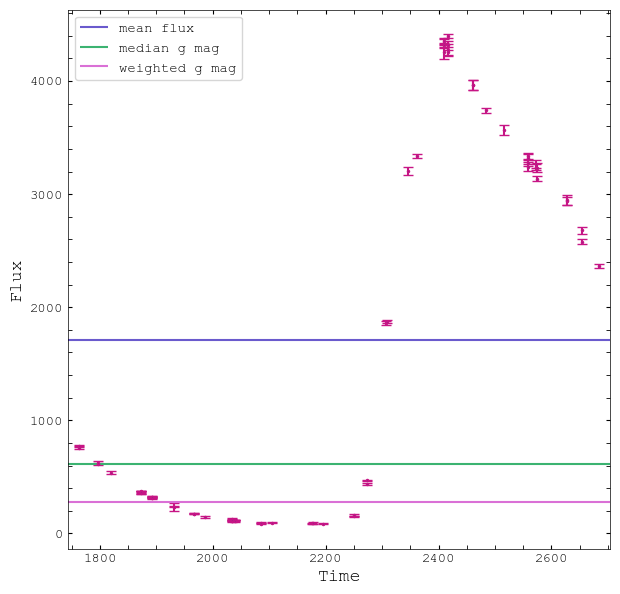

In [153]:
create_figure((7,7))
plt.errorbar(g_time, g_flux, yerr = flux_err, mec='mediumvioletred',ecolor='mediumvioletred',
             fmt='o', ms=1.5, capsize=3.4, color='darkslateblue')
plt.hlines(mean_flux, g_time.min()-20, g_time.max()+20, color = 'slateblue', label = 'mean flux')
plt.hlines(median_flux, g_time.min()-20, g_time.max()+20, color = 'mediumseagreen', label = 'median g mag')
plt.hlines(weighted_mean_flux, g_time.min()-20, g_time.max()+20, color = 'orchid', label = 'weighted g mag')
plt.xlim(g_time.min()-20, g_time.max()+20)
plt.xlabel('Time', size = 13)
plt.ylabel('Flux', size = 13)
plt.legend()
plt.show()

In [154]:
# compute g mag error
gmag_err = (2.5/np.log(10))*(flux_err/g_flux)
mean_gmag = np.mean(g_mag)
median_gmag = np.median(g_mag)
weighted_mean_g = compute_weighted_mean(g_mag, gmag_err)

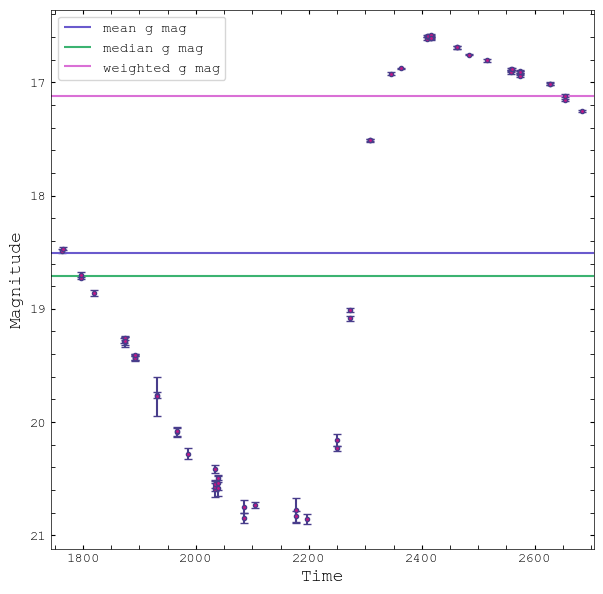

In [155]:
create_figure((7,7))
plt.errorbar(g_time, g_mag, yerr = gmag_err, fmt='o', ms = 3, mec='darkslateblue',
             ecolor='darkslateblue', capsize=3, color = 'mediumvioletred')
plt.hlines(mean_gmag, g_time.min()-20, g_time.max()+20, color = 'slateblue', label = 'mean g mag')
plt.hlines(median_gmag, g_time.min()-20, g_time.max()+20, color = 'mediumseagreen', label = 'median g mag')
plt.hlines(weighted_mean_g, g_time.min()-20, g_time.max()+20, color = 'orchid', label = 'weighted g mag')
plt.gca().invert_yaxis()
plt.xlim(g_time.min()-20, g_time.max()+20)
plt.xlabel('Time', size = 13)
plt.ylabel('Magnitude', size = 13)
plt.legend()
plt.show()

## Simulating observations with Poisson noise

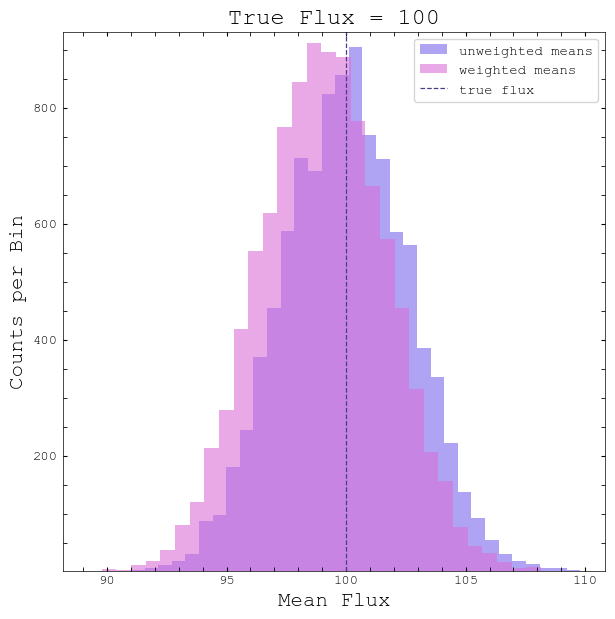

In [161]:
num_obs = 15
num_sources = 10000
flux_true = 100
epsilon = 1e-10
weighted_means = np.zeros((num_sources))
unweighted_means = np.zeros((num_sources))
for i in range(num_sources):
    fluxes = np.random.poisson(flux_true, num_obs)
    fluxs_err = np.sqrt(fluxes) + epsilon
    unweighted_means[i] = np.mean(fluxes)
    weighted_means[i] = compute_weighted_mean(fluxes, fluxs_err)
    
bins = num_sources // 300

create_figure((7,7))
counts_u, bins_u, _ = plt.hist(unweighted_means, bins = bins, color = 'mediumslateblue', alpha = 0.6, label = 'unweighted means')
counts_w, bins_w, _ = plt.hist(weighted_means, bins = bins, color = 'orchid', alpha = 0.6, label = 'weighted means')
min_val = min(np.min(counts_u), np.min(counts_w))
max_val = max(np.max(counts_u), np.max(counts_w))
plt.vlines(100, min_val, max_val+20, lw = 0.9, ls = '--', color = 'darkslateblue', label = 'true flux')
plt.xlabel('Mean Flux', size = 15)
plt.ylabel('Counts per Bin', size = 15)
plt.title('True Flux = 100', size = 17)
plt.ylim(min_val, max_val+20)
plt.legend()
plt.show()